In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = 'mnist/t10k-images-idx3-ubyte'

In [3]:
fp = open(filename, 'rb')

In [4]:
magic = struct.unpack('>i', fp.read(4))
print('magic number is "%d"' % (magic))

magic number is "2051"


In [5]:
n_images, height, width = struct.unpack('>iii', fp.read(4 * 3))
print('#image: %d' % (n_images))
print('size: %d x %d' % (width, height))

#image: 10000
size: 28 x 28


In [6]:
n_pixels = width * height
pixels = struct.unpack('>' + 'B' * n_pixels, fp.read(1 * n_pixels))

In [7]:
pixels = np.asarray(pixels, dtype='uint8')
pixels = pixels.reshape((height, width))

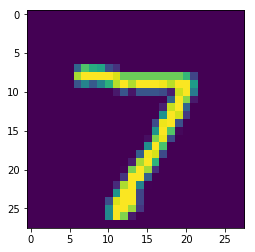

In [8]:
plt.imshow(pixels)
plt.show()

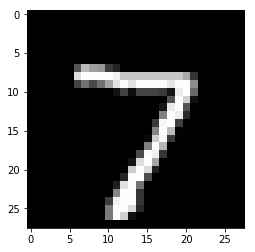

In [9]:
plt.imshow(pixels, cmap='gray')
plt.show()

In [10]:
images = []
for i in range(100):
    pixels = struct.unpack('>' + 'B' * n_pixels, fp.read(1 * n_pixels))
    pixels = np.asarray(pixels, dtype='uint8')
    pixels = pixels.reshape((height, width))
    images.append(pixels)

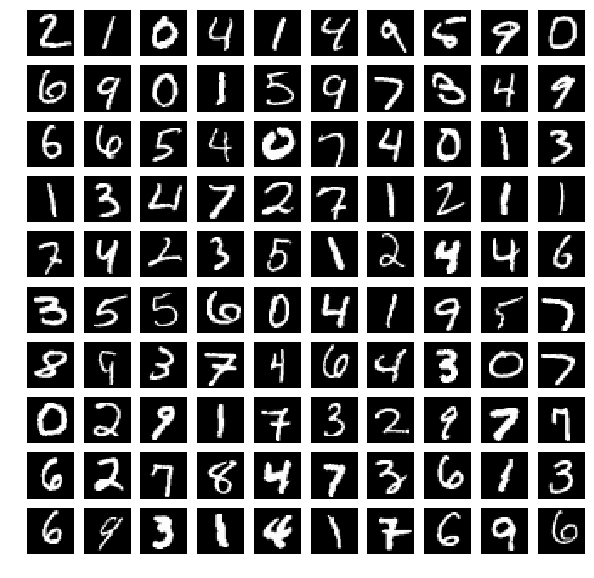

In [11]:
# Matplotlibを使ったタイリング
fig = plt.figure(figsize=(10, 10))

for i in range(10):
    for j in range(10):
        index = i * 10 + j
        image = images[index]

        # 10x10のタイルのindex番目のaxisという意味
        ax = fig.add_subplot(10, 10, index + 1)
        ax.imshow(image, cmap='gray')
        ax.axis('off')

plt.show()

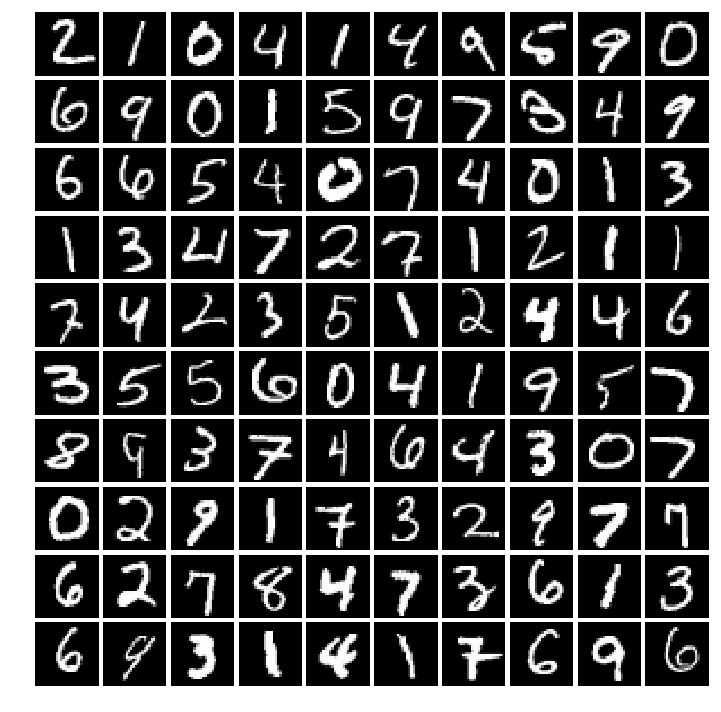

In [12]:
# もう少し気の利いたタイリング

# 全ての画像にマージンをつける
margin = 1
pad_images = [np.pad(image, (margin, margin), mode='constant', constant_values=255) for image in images]

# 画像の列をNumPyの配列に変えてreshape
pad_images = np.asarray(pad_images).reshape((10, 10, height + margin * 2, width + margin * 2))

# 縦横の列を結合する
image_grid = np.transpose(pad_images, axes=(0, 2, 1, 3))
image_grid = np.reshape(image_grid, (10 * (height + margin * 2), 10 * (width + margin * 2)))

# 表示
plt.figure(figsize=(10, 10))
plt.imshow(image_grid, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()